# Исследовательский проект бизнес-показателей "Procrastinate Pro+"

Аналитическое иссмледование особенностей маркетинговой кампании ``Procrastinate Pro+``. Не смотря на высокие вложения, компания терпит серьёзные убытки. Отделу аналитиков поставлена задача зучить особенности пользователей 

**Цель исследования:**
- изучение особенностей пользователей 
- выявить проблемные аспекты рекламной кампании 

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными о посещениях
- выгрузка покупок за указанный период
- рекламные расходы

**Ход исследования:**
- 1. Ознакомление с данными
- 2. Поиск ошибок в датасетах
- 3. Определение размерности групп пользователей, в добровольно-принудительном порядке принявших участие в исследовании 
- 4. Расчёт метрик, построение график, изучение особенностей новой маркетинговой политики компании 

<a class="anchor" id="head-main"></a>
**Оглавление**:
1. [**Первое знакомство с данными**](#chapter1)


   > 1.1 [*Импортирование библиотек и выгрузка данных*](#chapter1-1)
   
   > 1.2 [*Общая информация о датасетах*](#chapter1-2)
   

   
   
2. [**Предобработка данных**](#chapter2)

   > 2.1 [*Переименуем колонки датасетов*](#chapter2-1)
   
   > 2.2 [*Заменим тип данных в нужных столбцах*](#chapter2-2)
   
   > 2.3 [*Пропуски*](#chapter2-3)
   
   > 2.4 [*Поиск аномальных значений*](#chapter2-4)
   
   > 2.5 [*Дубликаты*](#chapter2-5)
   
   > 2.6 [*Поиск ошибчных значений в исчисляемых столбцах*](#chapter2-6)
   
   > 2.7 [Выводы блока предобработки данных](#chapter2-7)
   
3. [**Исследовательский анализ данных**](#chapter3)
   
   > 3.1 [*Изучаемый период*](#chapter3-1)
   
   > 3.2 [*Применение функций для анализа*](#chapter3-2)
   
   > 3.3 [*Исследуем пользователей по странам*](#chapter3-3)
   
   > 3.4 [*Исследуем пользователей по устройствам*](#chapter3-4)
   
   > 3.5 [*График отношения пользовтелей по каналам*](#chapter3-5)
   
   > 3.6 [*Маркетинг*](#chapter3-6)
   
   > 3.7 [*Общая сумма расходов на маркетинг*](#chapter3-7)
   
   > 3.8 [*Распределение трат по рекламным источникам и расчёт CAC*](#chapter3-8)
   
   > 3.9 [*Динамика расходов по неделям и месяцам*](#chapter3-9)
   
   > 3.10. [*Построение графиков LTV и ROI*](#chapter3-10)
   
   >> 3.10.1 [*LTV и ROI общие*](#chapter3-10-1)
   
   >> 3.10.2 [*LTV и ROI по девайсам*](#chapter3-10-2)
   
   >> 3.10.3 [*LTV и ROI по каналам привлечения*](#chapter3-10-3)
   
   >> 3.10.4 [*LTV u ROI по странам*](#chapter3-10-4)
   
   > 3.12 [*Расчёт удержания по странам*](#chapter3-12)
   
   > 3.13 [*Удержание пользователей по каналам привлечения*](#chapter3-13)
   
   > 3.14 [*Удержание пользователей по устрйоствам*](#chapter3-14)
   
   > 3.15 [*Расчёт конверсии*](#chapter3-15)
      
   >> 3.16.1 [*Общая конверсия пользователей с лайфтаймом в 14 дней за последний месяц*](#chapter3-15-1)
      
   >> 3.16.2 [*Конверсия по устройствам*](#chapter3-15-2)
      
   >> 3.16.3 [*Конверсия по странам*](#chapter3-15-3)
      
   >> 3.16.4 [*Конверсия по каналам привлечения*](#chapter3-15-4)

4. [**Выводы исследования**](#chapter4)

<a class="anchor" id="chapter1"></a>
## 1 Ознакомление с данными 

[назад к оглавлению](#head-main)

<a class="anchor" id="chapter1-1"></a>
### 1.2 Открытие библиотек и чтение данных 

[назад к оглавлению](#head-main)

In [19]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as ply 
import plotly.express as px
import numpy as np
from datetime import datetime, timedelta

In [20]:
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    outlay = pd.read_csv('/datasets/costs_info_short.csv')
except:
    visits = pd.read_csv('C:/Users/breaking bear/Desktop/ANALитика данных-ых-ых-хы-хы/Projects_dataset/visits_info_short.csv')
    orders = pd.read_csv('C:/Users/breaking bear/Desktop/ANALитика данных-ых-ых-хы-хы/Projects_dataset/orders_info_short.csv')
    outlay = pd.read_csv('C:/Users/breaking bear/Desktop/ANALитика данных-ых-ых-хы-хы/Projects_dataset/costs_info_short.csv')

In [21]:
display(visits.head(5), orders.head(5), outlay.head(5))

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


**Данные успешно выгружены**

<a class="anchor" id="chapter1-2"></a>
### 1.3 Изучение информации по датасетам 

[назад к оглавлению](#head-main)

In [22]:
display(visits.info())
display(orders.info())
outlay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


**Все три датасета нуждаются в изменениях типа object на тип datetime в колонках с датами**

<a class="anchor" id="chapter2"></a>
## 2 Блок предобработки данных

<a class="anchor" id="chapter2-1"></a>
### 2.1 Переименуем колонки датасетов

In [23]:
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
outlay.columns = outlay.columns.str.lower().str.replace(' ', '_')
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
display(orders.info())
display(outlay.info())
display(visits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

<a class="anchor" id="chapter2-2"></a>
### 2.2 Заменим тип данных в нужных столбцах

[назад к оглавлению](#head-main)

In [24]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
outlay['dt'] = pd.to_datetime(outlay['dt'])

#### Посмотрим на выводимый тип данных теперь 

In [25]:
display(visits.info())
display(orders.info())
outlay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


**Вывод:**
Тип данных успешно изменён

<a class="anchor" id="chapter2-3"></a>
### 2.3 Пропуски
В информации о датасетах отсутсвуют нулевые значения (по количеству строк и non-null значений)

**Вывод:** 
Пропуски отсутствуют

[назад к оглавлению](#head-main)

<a class="anchor" id="chapter2-4"></a>
### 2.4 Поиск аномальных значений

In [26]:
display(outlay.query('costs <= 0')['costs'].count())
display(visits.query('user_id <= 0')['user_id'].count())
orders.query('revenue <= 0')['revenue'].count()

0

0

0

[назад к оглавлению](#head-main)

<a class="anchor" id="chapter2-5"></a>
### 2.5 Дубликаты

[назад к оглавлению](#head-main)

In [27]:
display(visits.duplicated().sum())
display(orders.duplicated().sum())
display(outlay.duplicated().sum())
print('Все регионы :', visits['region'].unique())
print()
print('Все девайсы :', visits['device'].unique())
print()
print('Все каналы привлечения :', visits['channel'].unique())
print()
print('Каналы привлечения из датасета outlay :', outlay['channel'].unique()) 

0

0

0

Все регионы : ['United States' 'UK' 'France' 'Germany']

Все девайсы : ['iPhone' 'Mac' 'Android' 'PC']

Все каналы привлечения : ['organic' 'TipTop' 'RocketSuperAds' 'YRabbit' 'FaceBoom' 'MediaTornado'
 'AdNonSense' 'LeapBob' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds']

Каналы привлечения из датасета outlay : ['FaceBoom' 'MediaTornado' 'RocketSuperAds' 'TipTop' 'YRabbit'
 'AdNonSense' 'LeapBob' 'OppleCreativeMedia' 'WahooNetBanner'
 'lambdaMediaAds']


**Вывод:**
Неявные дубликаты отсутствуют

<a class="anchor" id="chapter2-6"></a>
### 2.6 Поиск ошибчных значений в исчисляемых столбцах

[назад к оглавлению](#head-main)

In [28]:
display(orders[orders['revenue'] <= 0]['revenue'].count())
outlay[outlay['costs'] <= 0]['costs'].count()

0

0

**Вывод:**
отрицательные и нулевые значения не обнаружены 

<a class="anchor" id="chapter2-7"></a>
### 2.7 Выводы блока предобработки данных

- Изменён тип данных в столбцах с датами 
- В блоке предобработки данных пропуски и trash-data невыявлены
- Неочевидны дубликаты не обнаружены

В остальных столбцах (`User ID' и столбцы с датами`) очевидно будут присутсвовать дубликаты, поэтому их проверять мы не будем.

[назад к оглавлению](#head-main)

# Блок анализа

<a class="anchor" id="chapter3"></a>
## 3 Исследовательский анализ данных

- Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.
- Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. 
- Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. 
- Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. 

[назад к оглавлению](#head-main)

<a class="anchor" id="chapter3-1"></a>
### 3.1 Изучаемый период
Узнаем, за какой период нам предоставили данные. Эта информация поможет нам в дальнейшем изучения для понимания работы функций и представлении о визуализации необходимых графиков

#### Период пользователей

In [29]:
max_data = visits['session_start'].max()
min_data = visits['session_start'].min()
print('Начало периода',min_data, 'Конец периода',max_data, sep='\n')

Начало периода
2019-05-01 00:00:41
Конец периода
2019-10-31 23:59:23


В датасат представлены данные за период в пять месяцев. Полученная информация даёт представление о масштабах периода и делению на группы по месяцам 

#### Период затрат на привлечение пользователей

In [30]:
max_data_ot = outlay['dt'].max()
min_data_ot = outlay['dt'].min()
print('Начало периода',min_data_ot, 'Конец периода',max_data_ot, sep='\n')

Начало периода
2019-05-01 00:00:00
Конец периода
2019-10-27 00:00:00


**Периоды совпадают**

### Функция создания профилей на основе датасета visits

[назад к оглавлению](#head-main)

In [31]:
def get_profiles(sessions, orders, ad_costs):
    # группируем по ID пользователя
    # находим первые сессию, канал притвлечения, регион и устройство 
    #
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
    # добавляем дату привлечения, месяц и категорию покупателя
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[ns]')
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
    # создаём сет по дате и каналу привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    new_users['dt'] = pd.to_datetime(new_users['dt'])
    # задаём стоимость привлечения в сет new_users по дате и каналу 
    # находим стоимость привлечения одного клиента
    # добавляем информацию о стоимости привлечения в профиль пользователя 
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    profiles['dt'] = pd.to_datetime(profiles['dt'])
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [32]:
users = get_profiles(visits, orders, outlay)
users.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-07 20:58:57,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-09 12:46:07,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01 09:58:33,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-22 21:35:48,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-02 00:07:44,False,0.230769



### Функция группировки по желаемым признакам

[назад к оглавлению](#head-main)

In [33]:
def group_n_part(data, dims):
    #создаём сет с набором участников по необходимым признакам 
    gpn_data = (data.groupby([dims,'payer'])
                  .agg({'user_id':'count'})
                  .rename(columns={'user_id':'users'})
                  .reset_index()
             )
    #задаём размеры когорт 
    cohort_size = (data.groupby([dims])
                   .agg({'user_id':'count'})
                   .rename(columns={'user_id':'cohort_size'})
                   .reset_index()
              )
    #объединяем сет с когортами в новой переменной
    gpn_percentage = gpn_data.merge(cohort_size, on=[dims], how='left')
    #вычисляем процент из группы
    gpn_percentage['part_of_cohort'] = round(gpn_percentage['users']  / gpn_percentage['cohort_size'], 2)
    #объединяем полученный процент с сетом
    gpn_data = gpn_data.merge(gpn_percentage[[dims,'users','part_of_cohort']], on=[dims,'users'], how='left')
    gpn_data = gpn_data.merge(cohort_size, on=[dims], how='left')
    
    return gpn_data.sort_values('cohort_size', ascending=True)


### Функция визуализации по результатам работы функции `group_n_part`

[назад к оглавлению](#head-main)

In [34]:
def gpn_plot(data, dims):
    """for creation grouped bar chart 
    based on data created by function "group_n_part" """
    
    final_data = data.pivot_table(index=dims, values='part_of_cohort', columns='payer')
    final_data.columns = ['free','payer']
    final_data = final_data.sort_values('payer', ascending=False)

    x = np.arange(len(final_data))  # задаём количество столбцов по оси x
    width = 0.25                           # параметр ширины столбца 
    multiplier = 0.5                       # параметр положения первого столбца группы
    
       
    fig, ax = plt.subplots(layout='constrained', figsize=(14,9))  # создаём пустой график
    gp = list(final_data.index)    # список с названиями групп
    # цикл добавления объектов на график 
    for attribute, measurement in final_data.items():
        offset = width * multiplier 
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=5)
        multiplier += 1
    # оставим подписи на графике 
    ax.set_ylabel('Процент от числа пользователей группы', fontsize=15)
    ax.set_title('График отношения платящих и не платящих пользователей по группам {}'.format(dims), fontsize=20)
    ax.set_xticks(x + width, gp)
    ax.legend(loc='upper right', ncols=2, fontsize=15)
    plt.show()
    
    
help(gpn_plot)

Help on function gpn_plot in module __main__:

gpn_plot(data, dims)
    for creation grouped bar chart 
    based on data created by function "group_n_part"



<a class="anchor" id="chapter3-2"></a>
### 3.2 Применение функций для анализа

[назад к оглавлению](#head-main)

In [35]:
# получаем сеты по желаемым признакам
user_region = group_n_part(users, 'region')
user_device = group_n_part(users, 'device')
user_channel = group_n_part(users, 'channel')

display(user_region.head(5), user_device.head(5), user_channel.head(5))

,region,payer,users,part_of_cohort,cohort_size
2,Germany,False,14365,0.96,14981
3,Germany,True,616,0.04,14981
0,France,False,16787,0.96,17450
1,France,True,663,0.04,17450
4,UK,False,16875,0.96,17575


,device,payer,users,part_of_cohort,cohort_size
2,Mac,False,28130,0.94,30042
3,Mac,True,1912,0.06,30042
4,PC,False,28918,0.95,30455
5,PC,True,1537,0.05,30455
0,Android,False,32982,0.94,35032


,channel,payer,users,part_of_cohort,cohort_size
19,lambdaMediaAds,True,225,0.10,2149
18,lambdaMediaAds,False,1924,0.90,2149
0,AdNonSense,False,3440,0.89,3880
1,AdNonSense,True,440,0.11,3880
17,YRabbit,True,165,0.04,4312


<a class="anchor" id="chapter3-3"></a>
### 3.3 Исследуем пользователей по странам

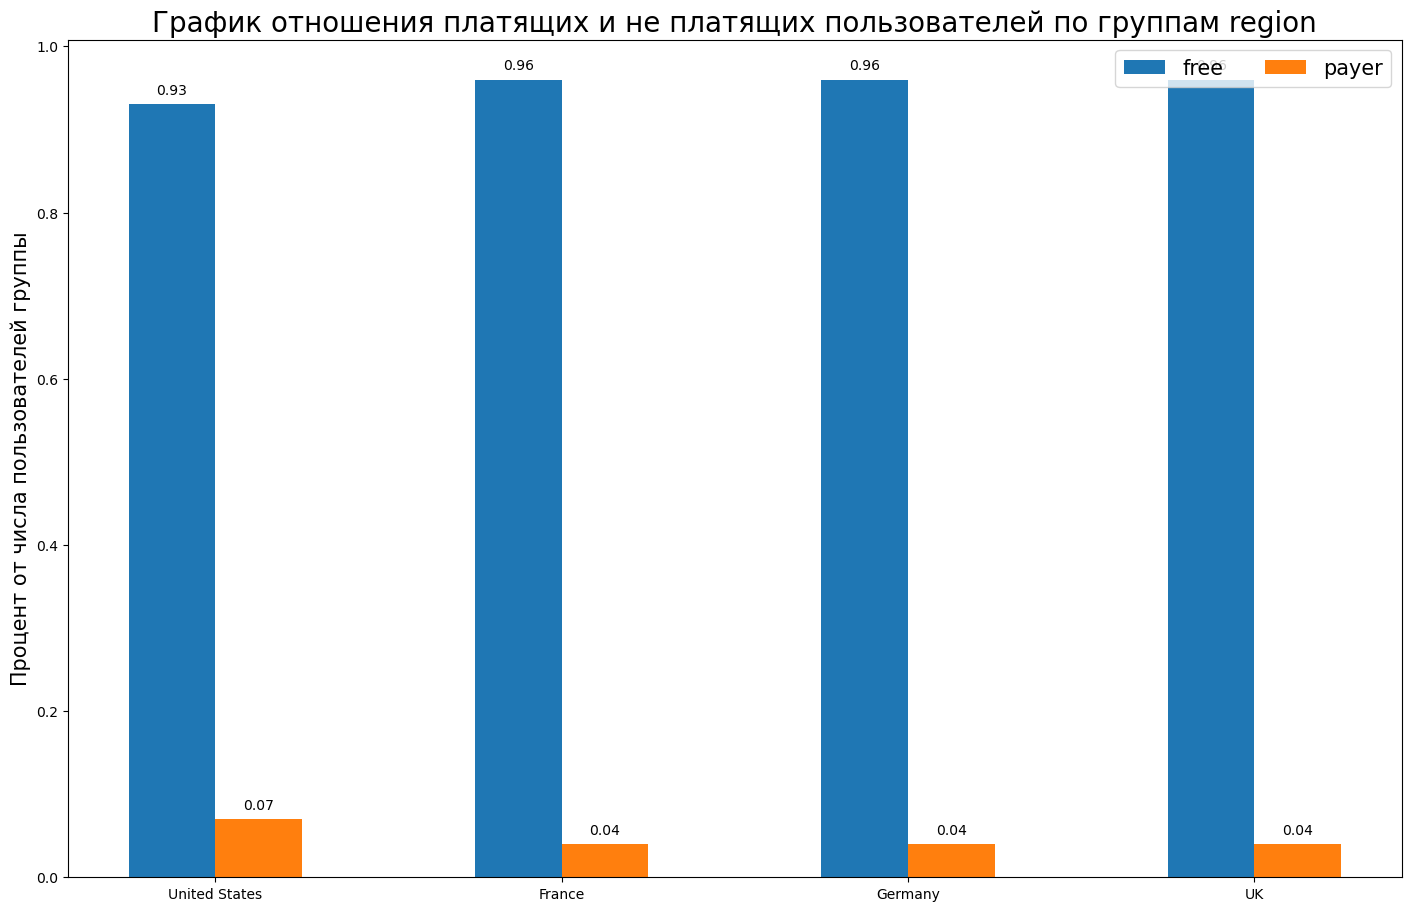

In [36]:
gpn_plot(user_region, 'region')

**Вывод:**
- США не только предоставляет наибольший приток пользователей, но и обладает самым высоким процентом платящих пользователей
- Остальные страны обладают одинаковой долей платящих пользователей. Также отметим, что количество привлечёных пользователей находится на приблезительно одном уровне 

[назад к оглавлению](#head-main)

<a class="anchor" id="chapter3-4"></a>
### 3.4 Исследуем пользователей по устройствам 

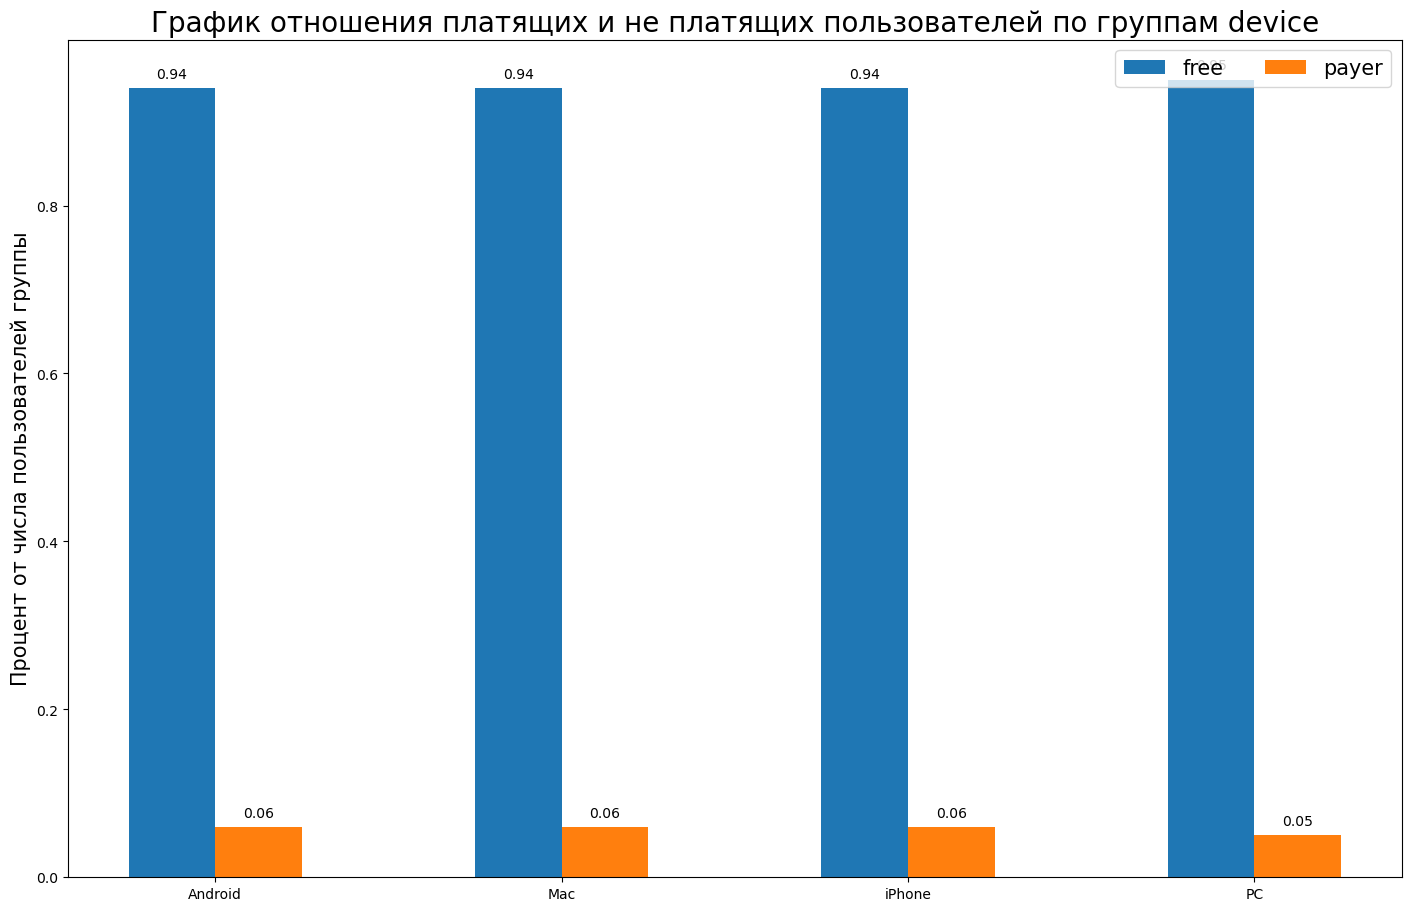

In [37]:
gpn_plot(user_device, 'device')


**Вывод:**
- Пользователи "яблочных" устройств куда охотнее расплачивыаются в нашем сервисе 
- У пользователей `iPhone` процент платящих пользователей не превышает медианный по всем категориям устройств, однако превосходит количественно
- Пользователи `PC` меншьу остальных категорий заинтересованы в оплате услуг

[назад к оглавлению](#head-main)

<a class="anchor" id="chapter3-5"></a>
### 3.5 График отношения пользовтелей по каналам

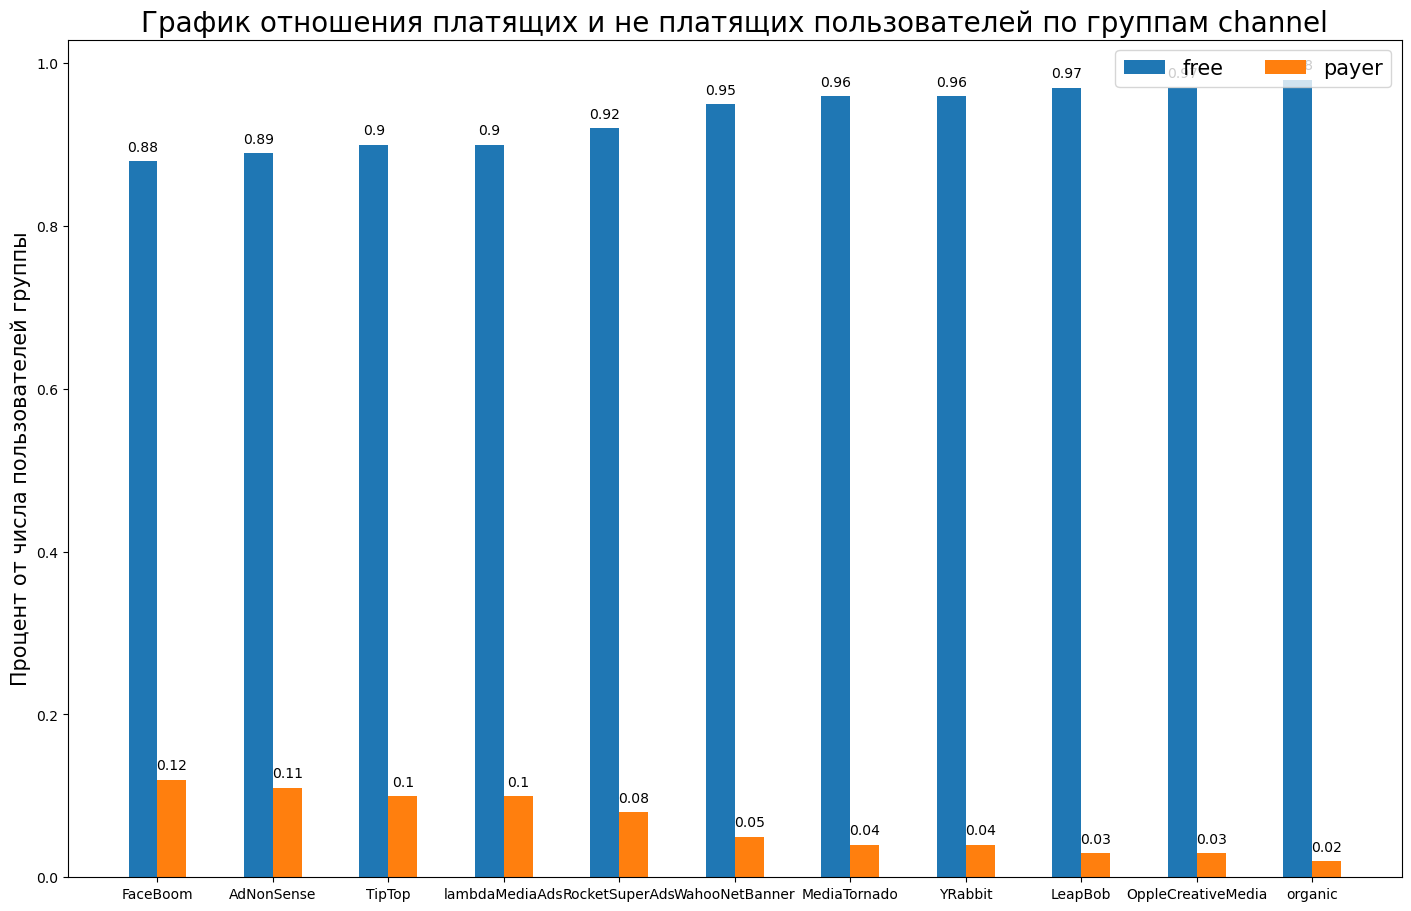

In [38]:
gpn_plot(user_channel, 'channel')

**Вывод:**
- Больше половины каналов привлечения не могут похвастаться своим процентом платящих пользователей
- `FaceBoom` лучший по показателям привлечения, обладающий нивысшим процентом платящих пользователей, среди платных каналов (очевидная отсылка на facebook)
- Худшим и по количеству привлекаемых пользователей и почти хуйдший по доле платящей группы является канал LambdaMediaAds
- При наличии плохого ROI от большинства платных каналов, пожалуй, стоит отказаться. Однако, это только предстоит выяснить 

[назад к оглавлению](#head-main)

<a class="anchor" id="chapter3-6"></a>
### 3.6 Маркетинг

- Посчитаем общую сумму расходов на маркетинг.
- Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Построим график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируем динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

[назад к оглавлению](#head-main)

### Полезные функции для визуализации

In [39]:
def plot_dynamic_costs(df, filterer1, filterer2):
    df[filterer1] = df['dt'].dt.isocalendar().week
    new_df1 = df.groupby([filterer1,'channel']).agg({'costs':'sum'}).reset_index()
    pivo1 = new_df1.pivot_table(index='channel', columns='week', values='costs')
        
    df[filterer2] = df['dt'].dt.month
    new_df2 = df.groupby([filterer2,'channel']).agg({'costs':'sum'}).reset_index()
    pivo2 = new_df2.pivot_table(index='channel', columns='month', values='costs')
    plt.figure(figsize=(20,10))
    
    ax1 = plt.subplot(1,2,1)
    pivo1.T.plot(grid=True, ax=ax1)
    plt.title('Динамика расходов на рекламу по неделям')
    ax2 = plt.subplot(1,2,2)
    pivo2.T.plot(grid=True, ax=ax2)
    plt.title('Динамика расходов на рекламу по месяцам')
    plt.show()

<a class="anchor" id="chapter3-7"></a>
### 3.7 Общая сумма расходов на маркетинг

In [40]:
display(round(outlay['costs'].sum(), 2))

105497.3

**Вывод:**
- сумма может показаться приемлимой, но на самом деле, она не учитывает все расходы на маркетинговый отдел с зарплатами сотрудников на изучаемый период. 

Чует моё сердце, что сумму `105497` можно сделать поскромнее при правильном подходе. Учитывая специфику регионов датасета, не исключено, что речь идёт про траты в долларах, а не в рублях.  

[назад к оглавлению](#head-main)

<a class="anchor" id="chapter3-8"></a>
### 3.8 Распределение трат по рекламным источникам и расчёт CAC 

In [41]:

costs_pivo = (outlay
              .groupby('channel')
              .agg({'costs':'sum'})
              .reset_index()
              .sort_values('costs',ascending=False)
             ) 
cohort_size = users.groupby('channel').agg({'user_id':'nunique'}).reset_index()
costs_pivo = costs_pivo.merge(cohort_size, on='channel', how='left')
costs_pivo['cac'] = costs_pivo['costs'] / costs_pivo['user_id']
costs_pivo = costs_pivo.rename(columns={'costs':'total_cost','user_id':'cohort_size'})
display(costs_pivo.sort_values('cac', ascending=False))             

plt.show()

,channel,total_cost,cohort_size,cac
0,TipTop,54751.30,19561,2.799003
1,FaceBoom,32445.60,29144,1.113286
3,AdNonSense,3911.25,3880,1.008054
7,lambdaMediaAds,1557.60,2149,0.724802
2,WahooNetBanner,5151.00,8553,0.602245
5,RocketSuperAds,1833.00,4448,0.412095
4,OppleCreativeMedia,2151.25,8605,0.250000
9,YRabbit,944.22,4312,0.218975
8,MediaTornado,954.48,4364,0.218717
6,LeapBob,1797.60,8553,0.210172


**Выводы:**
- `LeapBoB` очень выгоден в привлечении, учитывая количество пользователей и расходов на них 
- `TipTop`, `FaceBoom` , `AdNonSense` невероятно дорогие каналы привлечения, все три каналы требуют более 1$ за привлечённого пользователя

[назад к оглавлению](#head-main)

<a class="anchor" id="chapter3-9"></a>
### 3.9 Динамика расходов по неделям и месяцам

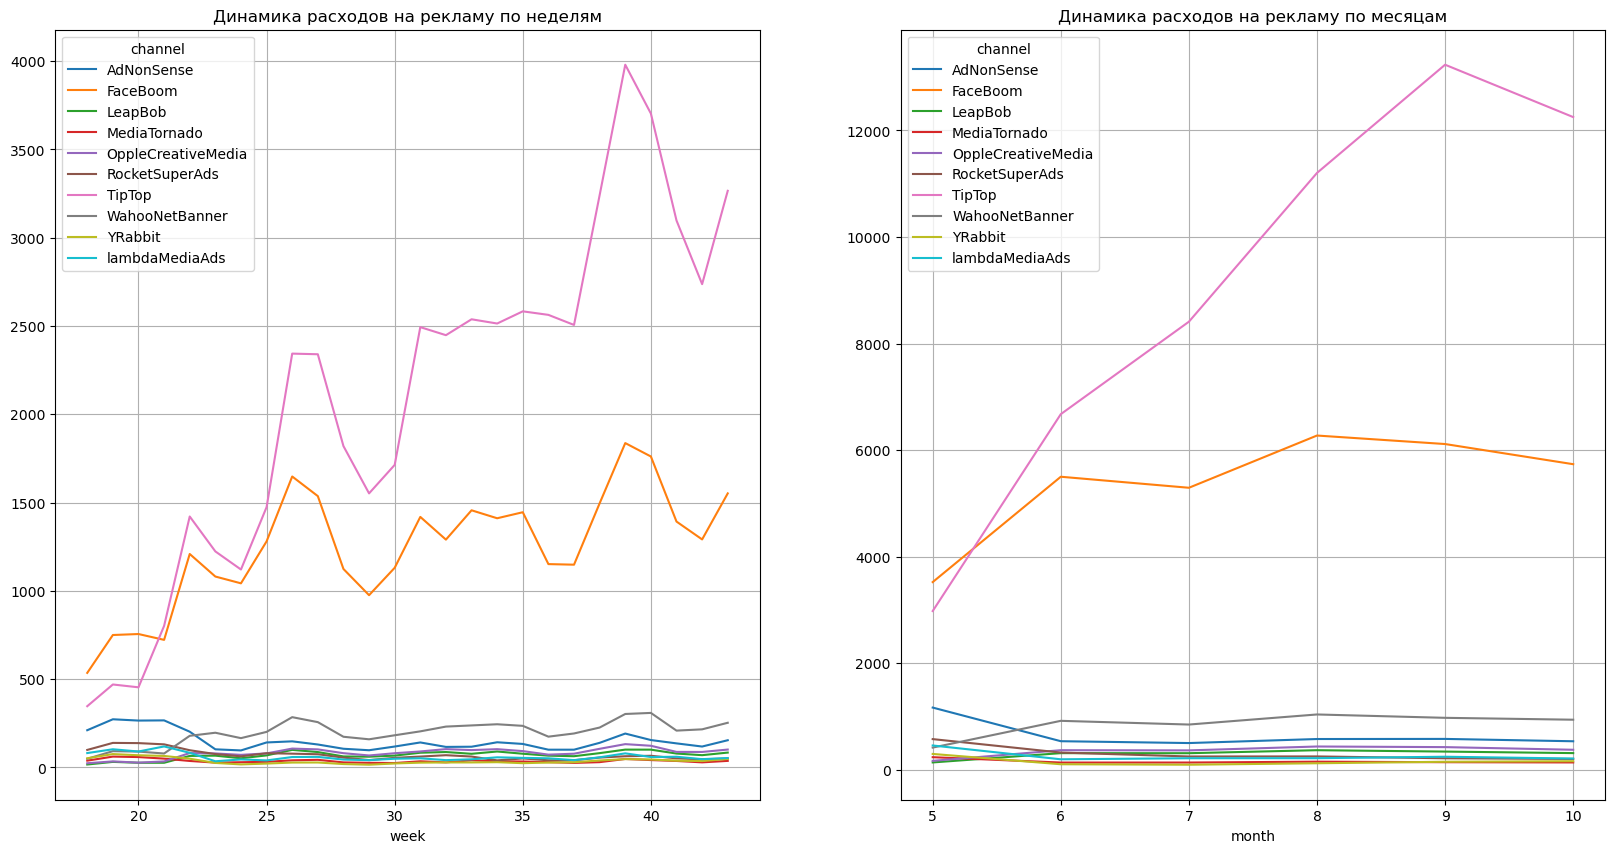

In [42]:
plot_dynamic_costs(outlay, 'week', 'month')

**Вывод**: 
- Расходы на канал привлечения `TipTop` очевидно завышены, учитывая, сколько пользователей приносит этот канал относительно органического источникаи канала `FaceBoom`. Так же по таблице **CAC** `TipTop` располагается на первом месте.
- Замтено явное увеличение расходов на 6ом месяце , причём, если притсмотреться, это актуально для всех каналов.
- Расходы на остальные каналы находятся примерно на одном уровне.

[назад к оглавлению](#head-main)

### Функция расчёта LTV и ROI

In [43]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # убираем пользователей недоживших до горизонта анализа 
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # объединяем  с таблицей заказов
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # расчитываем лайфтам пользователя
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # объединяем в екдиную когорту, если их нет  
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions += ['cohort']
    
    def group_by_dimensions(df, dims, horizon_days):
        # сводная таблица по когортам 
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # расчитываем сумму с накоплением по лайфтаймам 
        result = result.fillna(0).cumsum(axis=1)
        # получаем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт со сводной таблицей
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим сумму с накоплением на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размер когорт
        result['cohort_size'] = cohort_sizes
        # Находим затраты на пользователя 
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )
        # Расчитываем ROI и удаляем нулевые значения 
        roi = result.div(cac['cac'], axis=0)
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )
    # удаляем столбец со значением cohort, если такой имеется 
    if 'cohort' in dimensions:
        dimensions = []
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )


### Функция расчёта удержания 

In [44]:
def get_retention(
    profiles, sessions, observation_date, horizon_days, dim, ignore_horizon=False
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days
    
    # рассчитываем удержание
    result_grouped = result_raw.pivot_table(
        index=[dim, 'payer'], columns='lifetime', values='user_id', aggfunc='nunique'
    )
    cohort_sizes = (
        result_raw.groupby([dim,'payer'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_size'})
    )
    result_grouped = cohort_sizes.merge(
        result_grouped, on=[dim,'payer'], how='left'
    ).fillna(0)
    result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0)

    # исключаем все лайфтаймы, превышающие горизонт анализа
    result_grouped = result_grouped[
        ['cohort_size'] + list(range(horizon_days))
    ]

    # восстанавливаем столбец с размерами когорт
    result_grouped['cohort_size'] = cohort_sizes

    # возвращаем таблицу удержания и сырые данные
    return result_raw, result_grouped


### Функция расчёта конверсии

In [45]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = (result.div(result['cohort_size'], axis=0))*100
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time


### Функция-фильтр для нахождения со скользящим окном

In [46]:
def filter_data(df, window):
    # итератором column проходим по всем колонкам в датасете, заменяя их на окно со средним значением 
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df


### Функция построения графиков и функция-сглаживатель

In [47]:
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 15))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    cac_history = roi_history[['cac']]
    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [48]:
def plot_conv(conv, typ):
    plt.figure(figsize=(15,8))
    
    sns.heatmap(conv.drop(columns='cohort_size'), annot=True)
    plt.yticks(rotation=45)
    plt.title('Тепловая карта конверсии по {}'.format(typ))
    plt.xlabel('Лайфтайм')

    conv.drop(columns='cohort_size').T.plot(grid=True, figsize=(15,8))

    plt.title('График конверсии по {}'.format(typ))
    plt.xlabel('Процент конверсии')
    plt.ylabel('лайфтайм')
    plt.show()
    

<a class="anchor" id="chapter3-10"></a>
### 3.10 Построение графиков LTV и ROI 

[назад к оглавлению](#head-main)

<a class="anchor" id="chapter3-10-1"></a>
#### 3.10.1 LTV и ROI общие

In [49]:
users = users.query('channel != "organic"')
observation_date = pd.to_datetime('2019-11-01')
horizon_days = 14

result_raw, ltv, ltv_time, roi, roi_time = get_ltv(users, orders, observation_date, horizon_days, dimensions=[])
display('Таблица ROI',roi)
display('Таблица LTV', ltv)

'Таблица ROI'

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,,
All users,88644,1.117794,0.309163,0.389834,0.451341,0.501962,0.547002,0.58541,0.620991,0.652873,0.684043,0.712711,0.739091,0.762278,0.785579,0.806974


'Таблица LTV'

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,
All users,88644,0.34558,0.435754,0.504507,0.56109,0.611436,0.654368,0.69414,0.729778,0.764619,0.796665,0.826152,0.85207,0.878116,0.90203


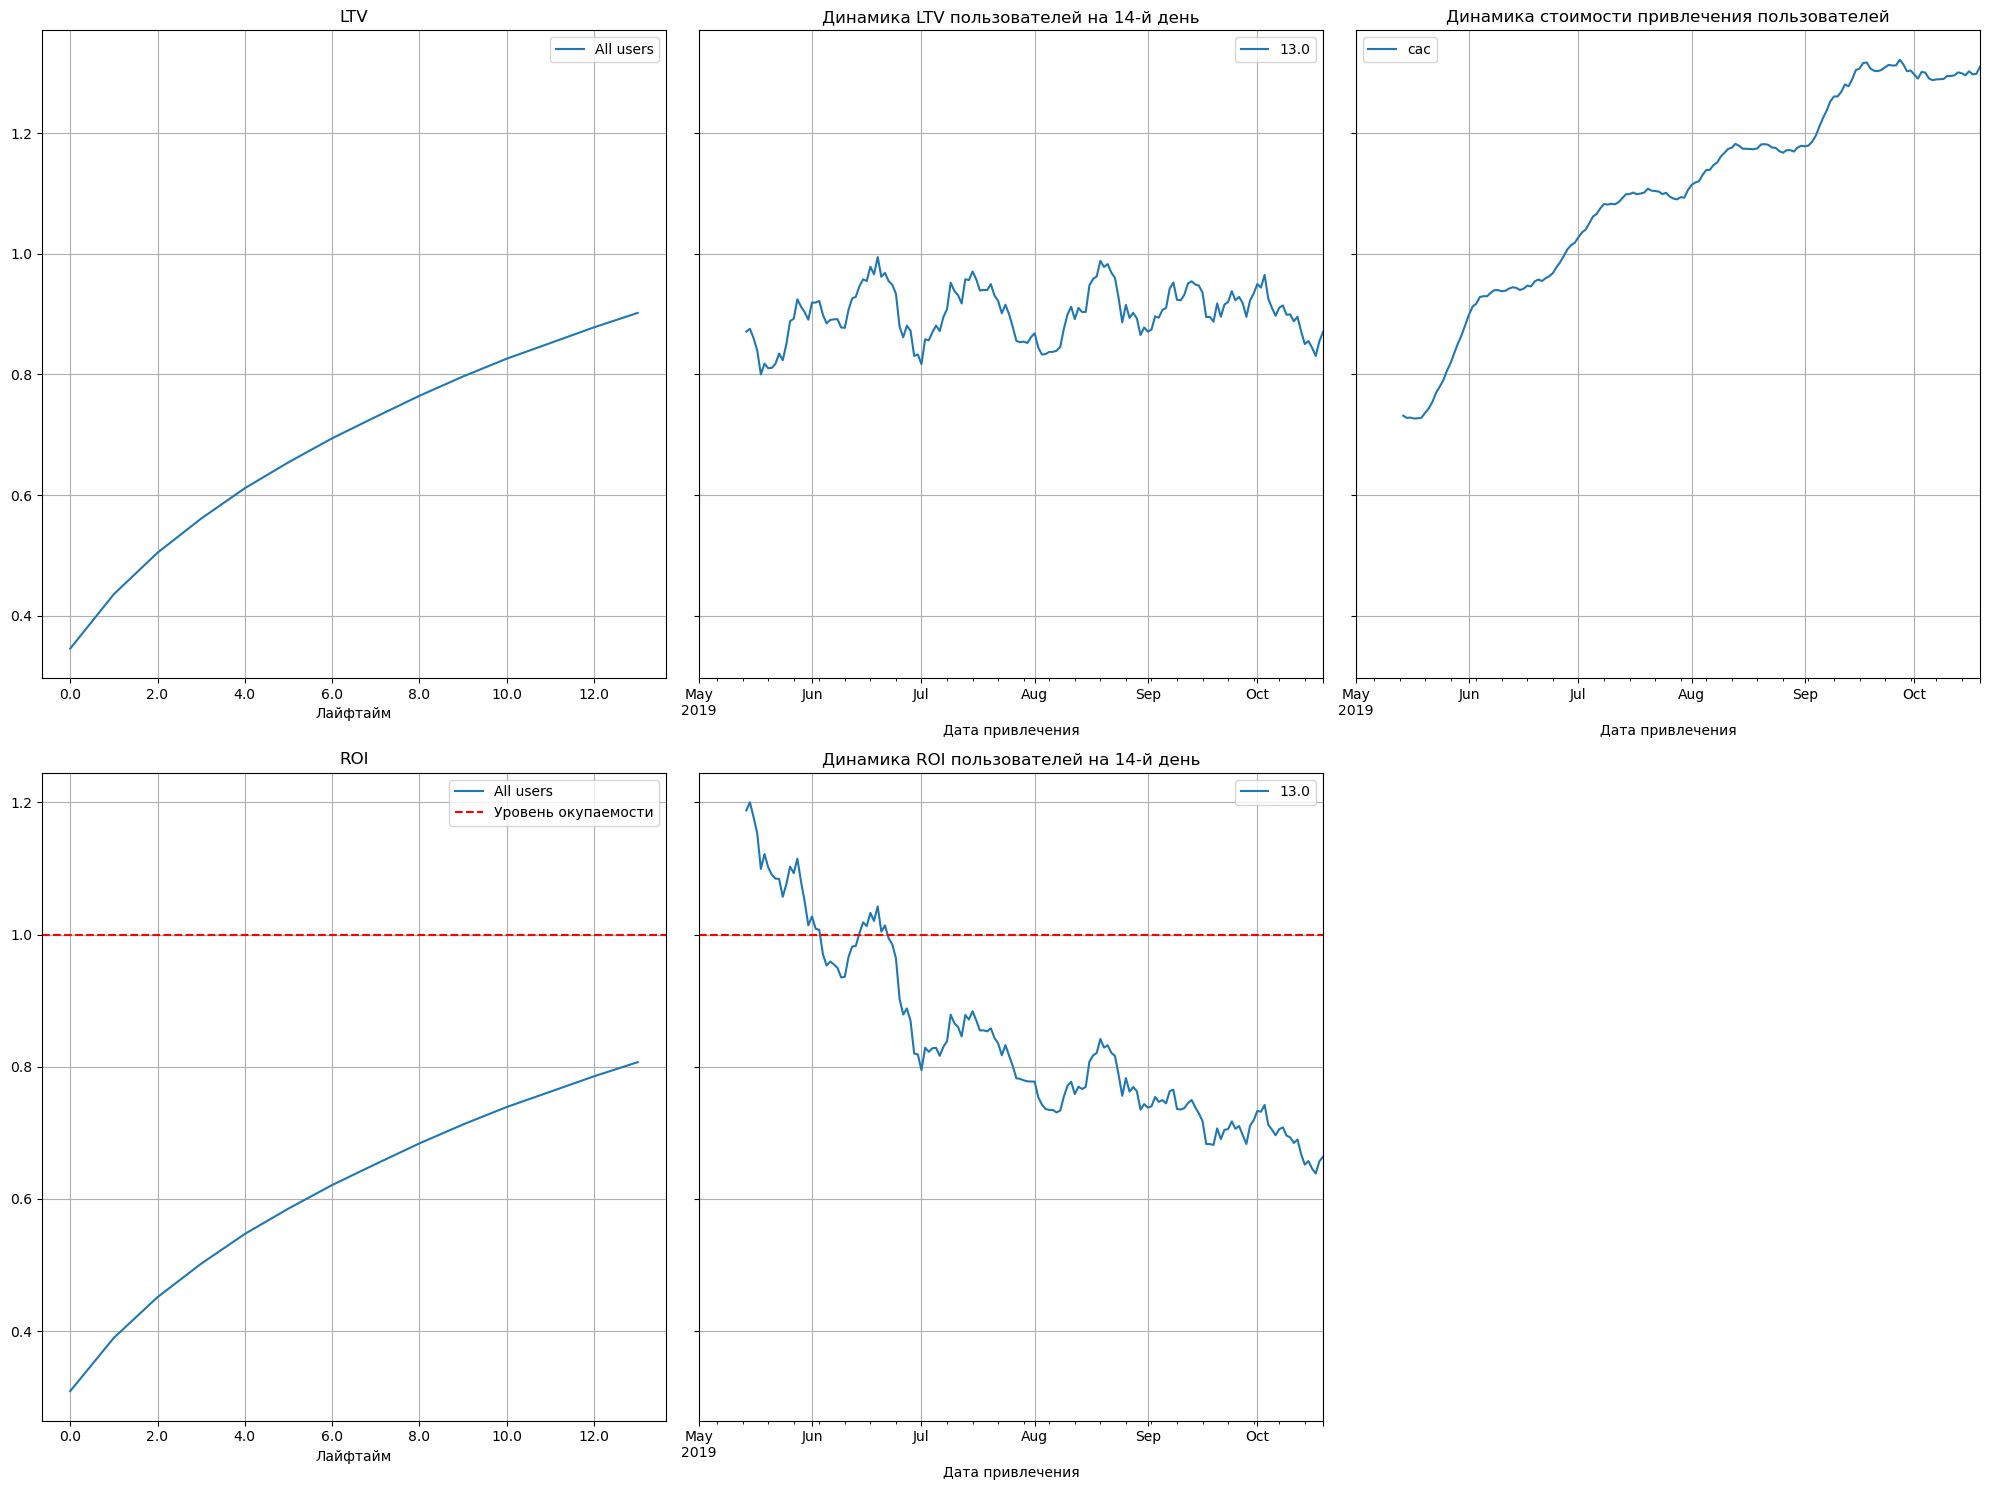

In [50]:
plot_ltv_roi(ltv, ltv_time, roi, roi_time, 14, window=14)

**Выводы:**
- LTV естественным образом растёт 
- Резкий скачок стоимости привлечения в начале лета 2019года
- ROI последнего месяца не оправдывает вложений
- По динамике ROI замтеный переход в убытки в середине июля 

**Пердположения:**
- С увеличиением расходов на привлечение пользователей упал ROI в начале лета
- Теоретически могло выйти обновление обновление с багами, посмотрим дальше подробнее на каналы привлечения и динамики по устройствам

[назад к оглавлению](#head-main)

<a class="anchor" id="chapter3-10-2"></a>
#### 3.10.2 LTV и ROI по девайсам

In [51]:
observation_date = pd.to_datetime('2019-11-01')
horizon_days = 14

result_raw, ltv, ltv_time, roi, roi_time = get_ltv(users, orders, observation_date, horizon_days, dimensions=['device'])

display('Таблица ROI по девайсам',roi)
display('Таблица LTV по девайсам', ltv)

'Таблица ROI по девайсам'

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
device,,,,,,,,,,,,,,,,
Android,20683,1.019759,0.332645,0.422419,0.490517,0.544460,0.596376,0.648580,0.686250,0.724251,0.758989,0.791216,0.817714,0.839481,0.870765,0.894425
Mac,17747,1.276219,0.299506,0.376283,0.431058,0.474117,0.510255,0.537354,0.565601,0.589926,0.619766,0.646735,0.671809,0.692961,0.708825,0.729139
PC,18128,0.792724,0.349933,0.456068,0.542966,0.612637,0.680712,0.733701,0.796291,0.835044,0.884297,0.920135,0.960624,0.994933,1.024449,1.054801
iPhone,32086,1.277021,0.288114,0.357321,0.410253,0.456661,0.495005,0.527449,0.556536,0.587035,0.610762,0.636023,0.658115,0.679258,0.700380,0.718064


'Таблица LTV по девайсам'

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
device,,,,,,,,,,,,,,,
Android,20683,0.339218,0.430766,0.500209,0.555218,0.608159,0.661395,0.699810,0.738562,0.773986,0.806850,0.833871,0.856068,0.887970,0.912098
Mac,17747,0.382235,0.480219,0.550124,0.605077,0.651197,0.685782,0.721831,0.752874,0.790957,0.825376,0.857376,0.884370,0.904617,0.930541
PC,18128,0.277400,0.361536,0.430422,0.485652,0.539617,0.581623,0.631240,0.661959,0.701004,0.729414,0.761510,0.788708,0.812106,0.836167
iPhone,32086,0.367928,0.456307,0.523902,0.583165,0.632132,0.673563,0.710708,0.749656,0.779956,0.812214,0.840427,0.867426,0.894400,0.916983


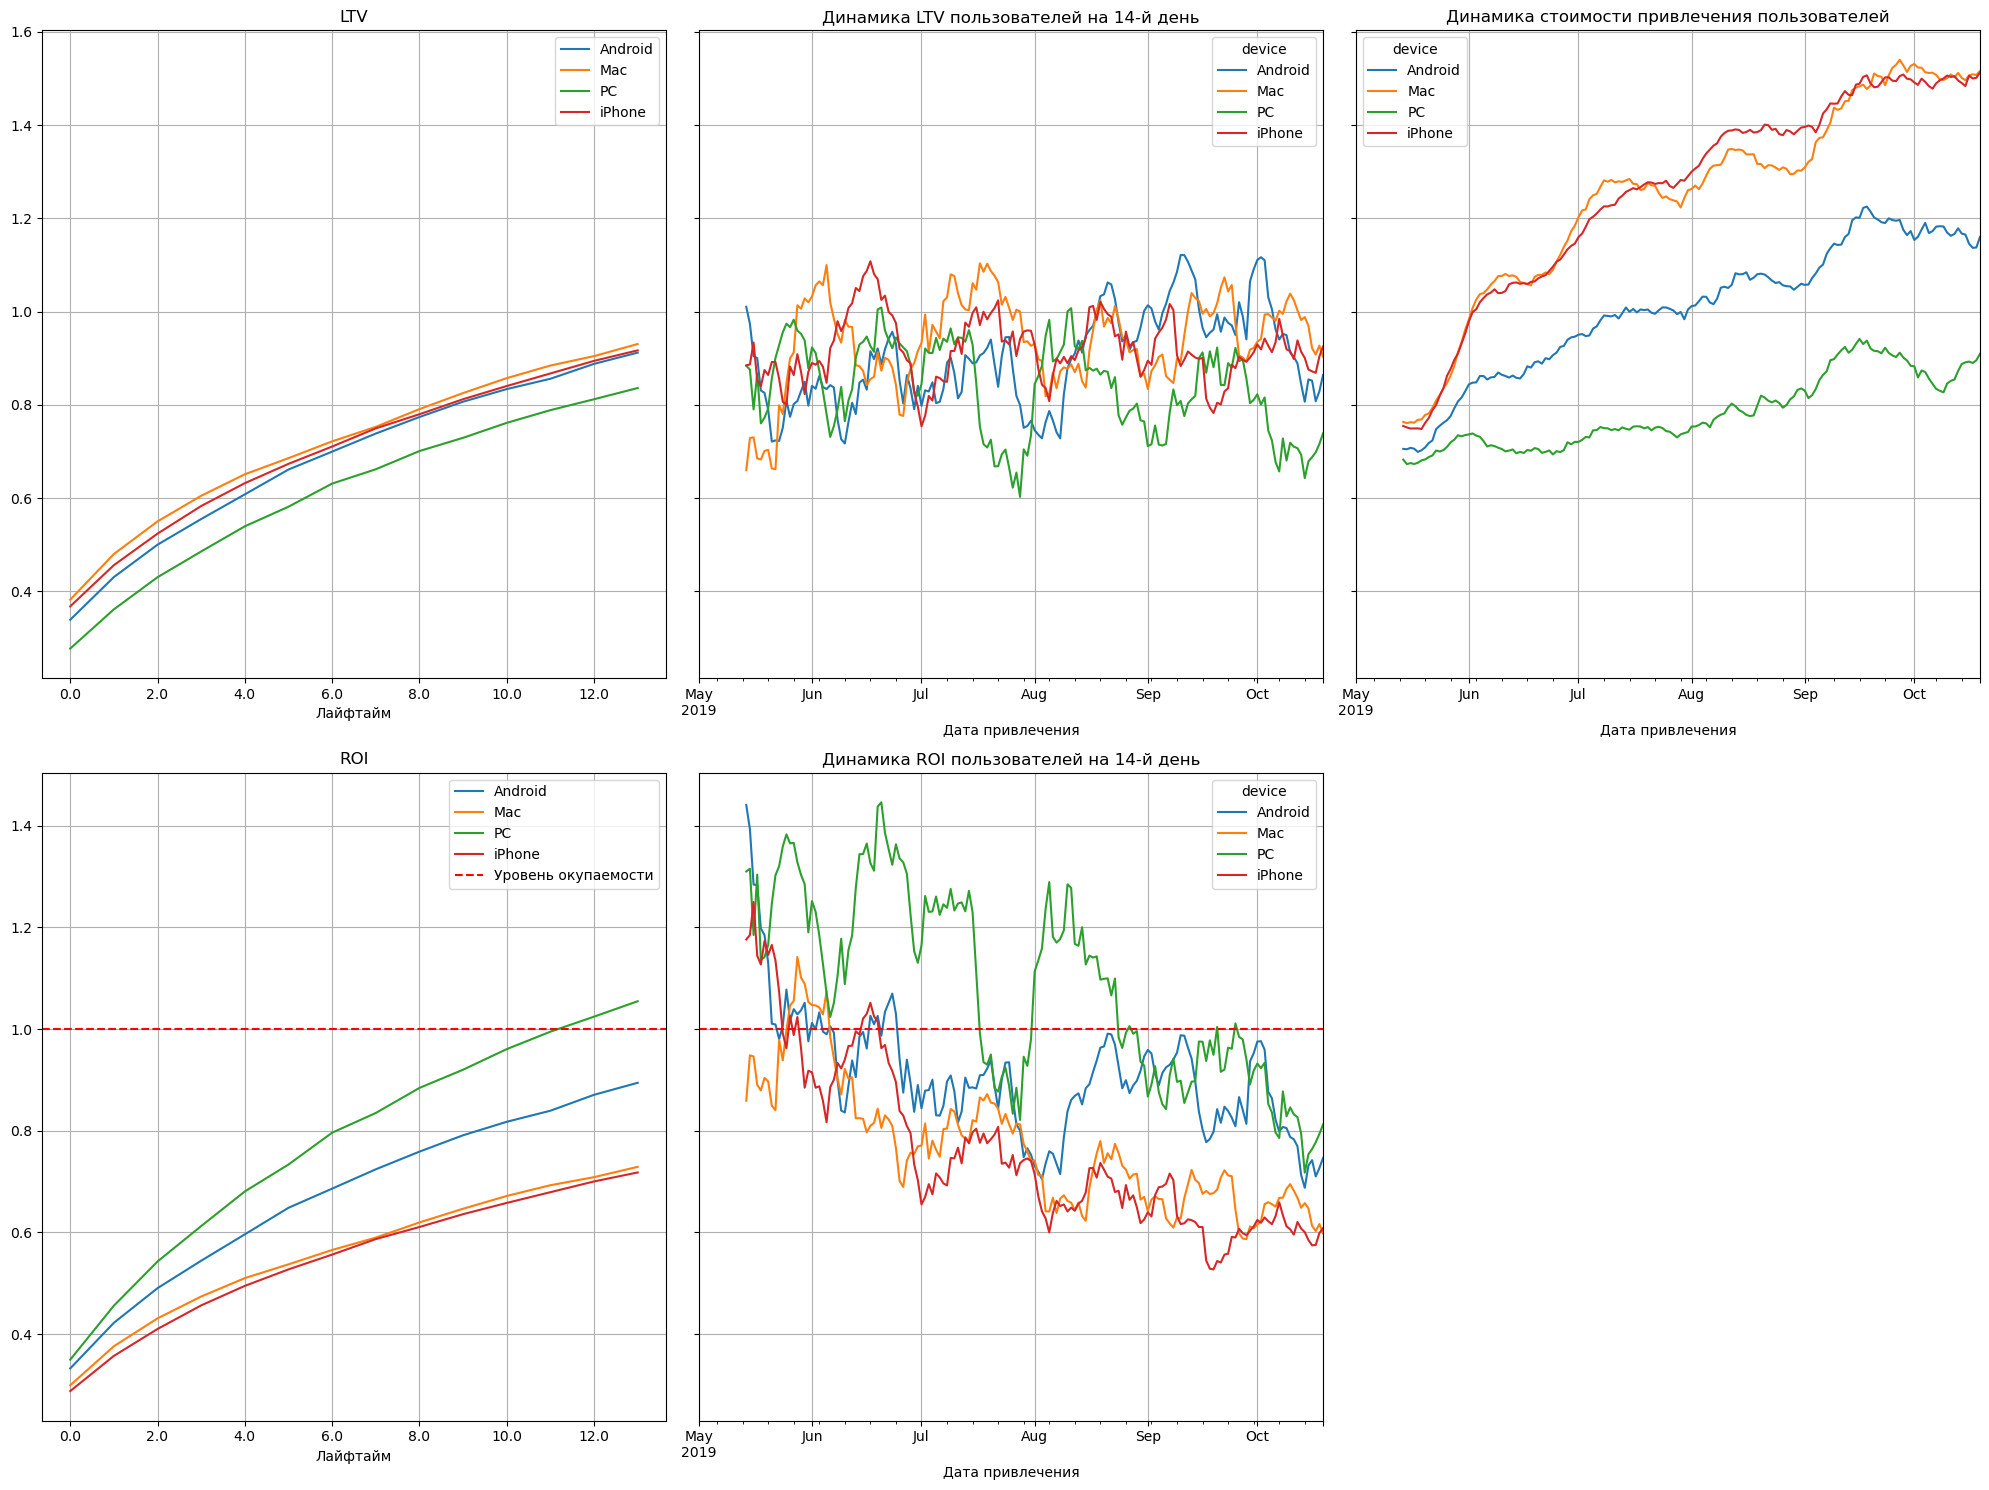

In [52]:
plot_ltv_roi(ltv, ltv_time, roi, roi_time, 14, window=14)

**Выводы:**
- Увеличение расходов на всех утсройствах связано с расходами на каналы привлечения по США(между прочим самая большая по пользователям страна в датасете)
- Вместе с увеличением расходов заметно падение ROI для всех устройств, кроме PC (с учётом низкой конверссии на этом устройстве, просто потрясающий результат) 

[назад к оглавлению](#head-main)

<a class="anchor" id="chapter3-10-3"></a>
#### 3.10.3 LTV и ROI по каналам привлечения 

In [53]:
result_raw, ltv, ltv_time, roi, roi_time = get_ltv(users, orders, observation_date, horizon_days, dimensions=['channel'])
display('Таблица ROI',roi)
display('Таблица LTV', ltv)

'Таблица ROI'

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,,
AdNonSense,3702,1.008023,0.501010,0.584460,0.639288,0.678069,0.701069,0.726752,0.748147,0.761519,0.782922,0.796294,0.800573,0.808597,0.820631,0.831337
FaceBoom,27544,1.113419,0.526040,0.593510,0.629343,0.654599,0.671035,0.682914,0.695801,0.704818,0.711685,0.719204,0.724119,0.729488,0.734210,0.737790
LeapBob,8103,0.210000,0.509752,0.741436,0.978967,1.120908,1.236450,1.374282,1.498034,1.589535,1.759730,1.877030,1.988470,2.085248,2.179087,2.252399
MediaTornado,4167,0.219035,0.627684,0.874814,1.127410,1.340729,1.516873,1.675432,1.773841,1.910531,2.008962,2.107371,2.216726,2.320602,2.402610,2.436519
OppleCreativeMedia,8139,0.249908,0.389100,0.526504,0.686996,0.826849,0.964769,1.065354,1.161037,1.238564,1.314661,1.388265,1.457448,1.507006,1.580649,1.637075
RocketSuperAds,4251,0.417431,0.497256,0.763336,0.948932,1.092347,1.235204,1.367935,1.531090,1.646391,1.767923,1.892809,1.991795,2.070538,2.152657,2.237019
TipTop,18498,2.757774,0.124575,0.180359,0.226321,0.268272,0.305449,0.339298,0.367570,0.397585,0.424763,0.451627,0.475535,0.497310,0.517679,0.539532
WahooNetBanner,8082,0.601856,0.317853,0.484298,0.629588,0.737309,0.858780,0.946188,1.049868,1.126808,1.205193,1.271878,1.350049,1.411192,1.477881,1.526304
YRabbit,4102,0.217087,0.752238,0.983122,1.179250,1.400049,1.641119,1.786814,1.910094,2.022179,2.123045,2.212703,2.313569,2.414457,2.516446,2.578086


'Таблица LTV'

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,
AdNonSense,3702,0.505030,0.589149,0.644417,0.683509,0.706694,0.732582,0.754149,0.767628,0.789203,0.802682,0.806996,0.815084,0.827215,0.838006
FaceBoom,27544,0.585703,0.660825,0.700722,0.728842,0.747143,0.760369,0.774718,0.784757,0.792404,0.800775,0.806247,0.812226,0.817483,0.821469
LeapBob,8103,0.107048,0.155702,0.205583,0.235391,0.259654,0.288599,0.314587,0.333802,0.369543,0.394176,0.417579,0.437902,0.457608,0.473004
MediaTornado,4167,0.137485,0.191615,0.246943,0.293667,0.332249,0.366979,0.388534,0.418474,0.440034,0.461589,0.485541,0.508294,0.526256,0.533684
OppleCreativeMedia,8139,0.097239,0.131578,0.171686,0.206636,0.241103,0.266240,0.290152,0.309527,0.328544,0.346938,0.364228,0.376613,0.395017,0.409118
RocketSuperAds,4251,0.207570,0.318640,0.396114,0.455980,0.515613,0.571019,0.639125,0.687255,0.737986,0.790118,0.831437,0.864307,0.898586,0.933801
TipTop,18498,0.343550,0.497389,0.624141,0.739834,0.842358,0.935707,1.013676,1.096450,1.171400,1.245485,1.311417,1.371467,1.427640,1.487908
WahooNetBanner,8082,0.191302,0.291477,0.378921,0.443754,0.516862,0.569469,0.631870,0.678176,0.725353,0.765488,0.812535,0.849334,0.889472,0.918615
YRabbit,4102,0.163301,0.213423,0.256000,0.303932,0.356265,0.387894,0.414656,0.438988,0.460885,0.480349,0.502245,0.524147,0.546287,0.559668


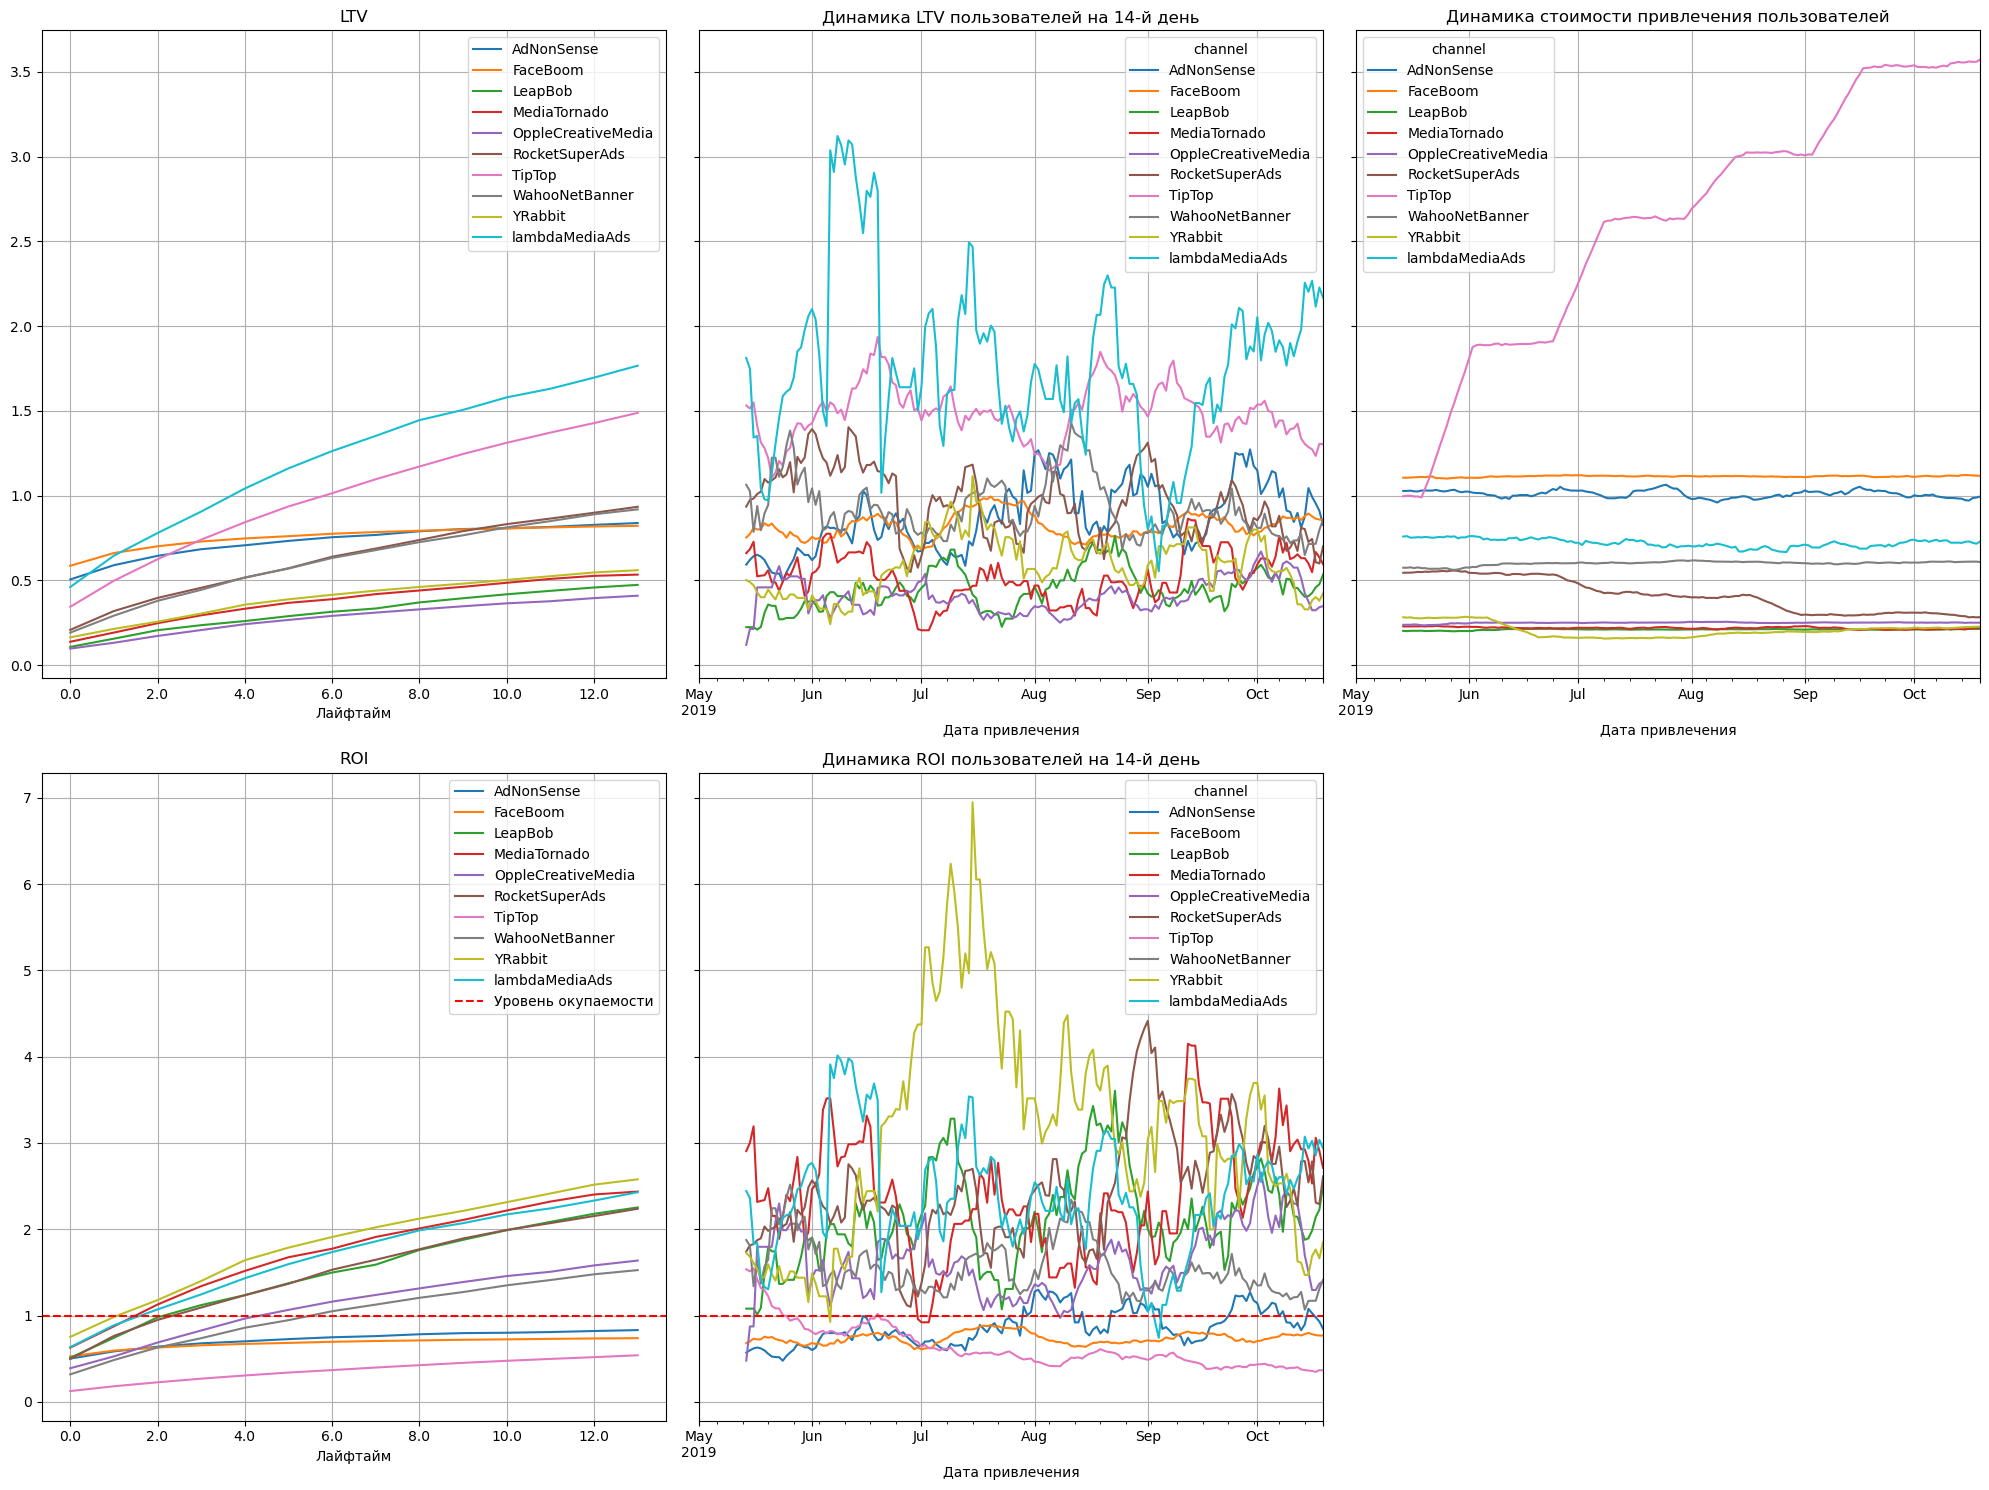

In [54]:
plot_ltv_roi(ltv, ltv_time, roi, roi_time, 14, window=14)

**Вывод:**
- Резкое увеличение расходов на рекламу напрямую связано с каналом привлечения `TipTop`
- Все три источника с превличением пользователя свыше 1 доллара не оправдывают своих влажений, ведь ROI находится стабильно ниже единицы

[назад к оглавлению](#head-main)

<a class="anchor" id="chapter3-10-4"></a>
#### 3.10.4 LTV u ROI по странам 

In [ ]:
result_raw, ltv, ltv_time, roi, roi_time = get_ltv(users, orders, observation_date, horizon_days, dimensions=['region'])
plot_ltv_roi(ltv, ltv_time, roi, roi_time, 14, window=14)

**Вывод:**
- Невероятно высокие расходы расходы на США 
- На графике ROI и его динамике видно, как резкое повышение расходов коррелирует с падением ROI 

[назад к оглавлению](#head-main)

<a class="anchor" id="chapter3-11"></a>
### 3.11 Расчёт удержания

Посмотрим на расчёт и графики удержания пользователей с лайфтаймом в 30 дней за каждый месяц. Что может быть лучше, чем свежие данные активности пользователей? Конечно же, визуализация этих данных! 


In [ ]:
result_r, retention = get_retention(users, visits, observation_date, 31, 'month')


plt.figure(figsize=(20,10))

(retention.query('payer == True')
         .drop(columns='cohort_size').T
         .plot(grid=True, ax=plt.subplot(1,2,1))
)
plt.title('График удержания платящих плоьзователей')
plt.xlabel('День')
plt.ylabel('Месяц')

(retention.query('payer == False')
          .drop(columns='cohort_size').T
          .plot(grid=True, ax=plt.subplot(1,2,2))
)
plt.title('График удержания неплатящих плоьзователей')
plt.xlabel('День')
plt.ylabel('Месяц')

plt.show()

**Вывод:**
- Платящих пользователей заметно проще удержать
- Октябрь выдался тяжёлым в плане удержания пользователей, заметные скачки на протяжении всего месяца 

**Предположение:**
- Непостоянство удержания может быть связано с ежемесячным обновлением, которое коснулось платящих пользователей 

[назад к оглавлению](#head-main)

<a class="anchor" id="chapter3-12"></a>
### 3.12 Расчёт удержания по странам

In [ ]:
result_r, retention = get_retention(users, visits, observation_date, 31, 'region')


plt.figure(figsize=(20,10))

(retention.query('payer == True')
         .drop(columns='cohort_size').T
         .plot(grid=True, ax=plt.subplot(1,2,1))
)
plt.title('График удержания платящих плоьзователей')
plt.xlabel('День')
plt.ylabel('Рейтинг удержания')

(retention.query('payer == False')
          .drop(columns='cohort_size').T
          .plot(grid=True, ax=plt.subplot(1,2,2))
)
plt.title('График удержания неплатящих плоьзователей')
plt.xlabel('День')
plt.ylabel('Рейтинг удержания')

plt.show()

**Вывод:**
- Удержание платящих пользователей США сильно страдает 

[назад к оглавлению](#head-main)

<a class="anchor" id="chapter3-13"></a>
### 3.13 Удержание пользователей по каналам привлечения 

In [ ]:
result_r, retention = get_retention(users, visits, observation_date, 31, 'channel')

display(retention.query('payer == True')
         .drop(columns='cohort_size').T)
plt.figure(figsize=(20,10))

(retention.query('payer == True')
         .drop(columns='cohort_size').T
         .plot(grid=True, ax=plt.subplot(1,2,1))
)
plt.title('График удержания платящих плоьзователей')
plt.xlabel('День')
plt.ylabel('Рейтинг удержания')

(retention.query('payer == False')
          .drop(columns='cohort_size').T
          .plot(grid=True, ax=plt.subplot(1,2,2))
)
plt.title('График удержания неплатящих плоьзователей')
plt.xlabel('День')
plt.ylabel('Рейтинг удержания')

plt.show()

**Выводы**:

- Ярко выраженное падение интереса у пользователей, привлечённых по каналам `AdNoSense` и `Faceboom`. В динамике уже за первые пять дней удержание стремится к бликзким к нулю значениям. Удержание пользовтелей по указанным каналам сравнимо с удержанием неплатящих пользователей.  
- `WahooNetBanner` показывает лучшую статистику удержания из всех выборок.  
- Неплатящие пользователи из различных каналов с одинаковой скоростью теряют интерес

[назад к оглавлению](#head-main)

<a class="anchor" id="chapter3-14"></a>
### 3.14 Удержание пользователей по устрйоствам 

In [ ]:
result_r, retention = get_retention(users, visits, observation_date, 31, 'device')


plt.figure(figsize=(20,10))

(retention.query('payer == True')
         .drop(columns='cohort_size').T
         .plot(grid=True, ax=plt.subplot(1,2,1))
)
plt.title('График удержания платящих плоьзователей')
plt.xlabel('День')
plt.ylabel('Рейтинг удержания')

(retention.query('payer == False')
          .drop(columns='cohort_size').T
          .plot(grid=True, ax=plt.subplot(1,2,2))
)
plt.title('График удержания неплатящих плоьзователей')
plt.xlabel('День')
plt.ylabel('Рейтинг удержания')

plt.show()

**Вывод:**
- Удержание пользователей почти одинаково для обеих категорий 
- Заметные скачки вниз для пользователей яблочных устройств 

[назад к оглавлению](#head-main)

<a class="anchor" id="chapter3-15"></a>
### 3.15 Расчёт конверсии 

[назад к оглавлению](#head-main)

<a class="anchor" id="chapter3-15-1"></a>
#### 3.15.1 Общая конверсия пользователей с лайфтаймом в 14 дней за последний месяц

In [ ]:
result_raw, conversion_total, conversion_t_in_time = get_conversion(users, 
                                                            orders, 
                                                            observation_date, 
                                                            horizon_days, 
                                                            dimensions=[])
display(conversion_total)

conversion_total.drop(columns='cohort_size').T.plot(grid=True, figsize=(16,9))
plt.title('Общая конверсия за 14 дней лайфтама последнего месяца')
plt.xlabel('Лайфтам')
plt.ylabel('Процент конверсии')
plt.show()

**Вывод:**
- Процент конверсии естественным образом повышает к концу обозреваемого лайфтайма (мало ли что очевидно)
- Необходимо искать пути повышения начального процента конверсии обозреваемого лайфтайма 

[назад к оглавлению](#head-main)

<a class="anchor" id="chapter3-15-2"></a>
#### 3.15.2 Конверсия по устройствам
Рассмотрим, как меняется конверсии в зависимости от типа устройства пользоваателя

In [ ]:
result_raw, conversion_dev, conversion_dev_in_time = get_conversion(users, 
                                                            orders, 
                                                            observation_date, 
                                                            horizon_days, 
                                                            dimensions=['device'])


**Вывод:**
- На устройствах фирмы яБлоко конверсия значительно выше
- Конверсия пользователей персональных компьютеров страдает (необходимо изучить работу приложения на PC) 
- Пользователей PC больше, чем MAC, следует решить проблему конверсии для больешй выручки с этих устройств, причём пользователи PC единственные сохраняют ROI в условиях общего падения  

[назад к оглавлению](#head-main)

<a class="anchor" id="chapter3-15-3"></a>
#### 3.15.3 Конверсия по странам
Расчёт конверсии по регионам

In [ ]:
result_raw, conversion_reg, conversion_reg_in_time = get_conversion(users, 
                                                            orders, 
                                                            observation_date, 
                                                            horizon_days, 
                                                            dimensions=['region'])

**Вывод:**
- Все пользователи, не проживающие на территории США сталкиваются с трудностями при использовании приложения 

[назад к оглавлению](#head-main)

<a class="anchor" id="chapter3-15-4"></a>
#### 3.15.4 Конверсия по каналам привлечения

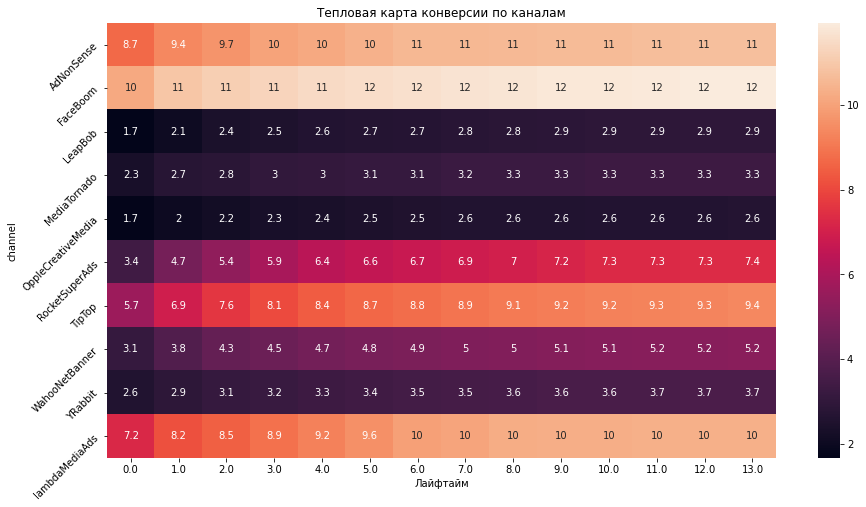

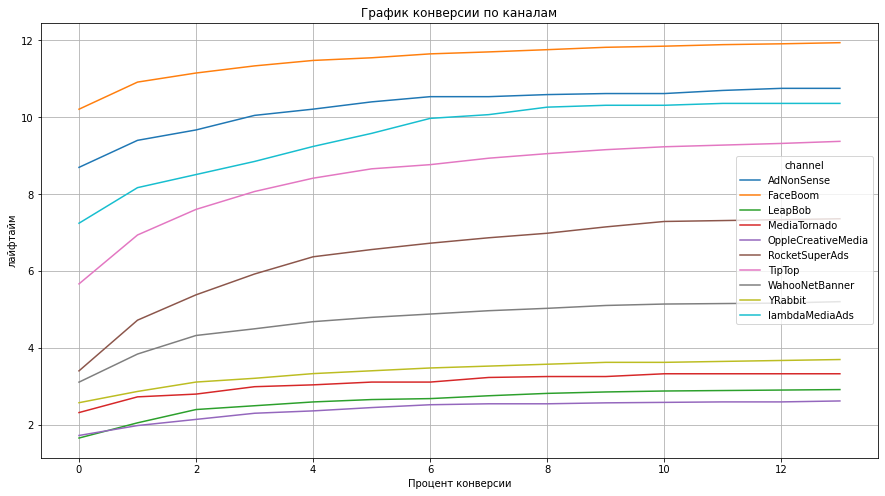

In [45]:
result_raw, conversion_c, conversion_c_in_time = get_conversion(users, 
                                                            orders, 
                                                            observation_date, 
                                                            horizon_days, 
                                                            dimensions=['channel'])


**Вывод:**
- Пользователи, привлечённые по каналу TipTop, куда менее заинтересованны в постоянном пользовании и покупаках в приложении, чем пользователи менее дорогих каналов привлечения
- Целых 6 каналов, включая органический, подвережены меньшей конверсии 
- Необходимо каким-то образом еще(несмотря на высокий уровень конверсии) повысить конверсию для пользоваталей с дорогостоящими каналами привлечения, чтобы перекрыть расходы 

[назад к оглавлению](#head-main)

<a class="anchor" id="chapter4"></a>
# 4 Вывод исследования 
Ниже ёмко представлены результаты исследования с разбивкой по категориям с акцентированием на важных моментах и рекомендациями

[назад к оглавлению](#head-main)

### Особенности регионального использования приложения 
- Большая часть пользователей приложения проживает на территории США. В том же числе на стоимость привлечения этих пользователей приходится большая часть маркетингового бюджета, при этом расходы никак не перекрываются доходом с привлечённых пользователей. На графиках исследования заметны эти особенности. Конверсия региона США находится на приемлимом уровне, однако низкий уровень удержания платящих пользователей негативно сказывается на ROI  
- Пользователи других не могут похвастаться высокой конверсией, однако их ROI в разы лучше, чем пользователей самой большой региональной категории. 

**Рекомендации:**
- 1. Увеличения конверсии малых регионов
- 2. Пересмотреть политику расхода бюджета в США 
- 3. Улучшение удержания платящих пользователей США

### Особенности каналов привлечения 
- Чрезмерно высокие расходы в трёх каналах. Цена за пользователя свыше одного доллара, а у канала `TipTop` и вовсе это значение достигает 2.7 за пользователя. При низких ROI, а также низком удержании пользователей у каналов `AdNonSense` и `FaceBoom`, следует обратиться к пересмотру целесообразности таких высоких расходов, а также решить проблему удержания платящих пользователей у двух крупных дорогостоящих каналов привлечения
- `TipTop` сильно превысил расходы в США, при этом не давая адекватных доходов. Следует поискать других авторов с ценами ниже в данной социальной сети. `TipTop` обеспечивает хороший приток пользователей, поэтому стоит лишь избежать издержек без полного отказа от этого канала привлечения 
- Менее крупные каналы привлечения нуждаются в проработке начальной конверсии. Возможно пользователи сталкиваются с трудностями при переходе и регистрации из определённых каналов: `LeapBoB`, `OppleCreativeMedia`, `YaRabbit`, `MediaTornado` 
- Отдельного упоминания стоит канал привлечения `YaRabbit` с его низким удержанием пользователей. Рекомендутеся отдельно изучить особенности этой аудитории, либо оставить канал в покое из-за выского ROI. 

### Особенности пользователей в зависимости от утсройства 
- Не взирая на высокую конверсию у яблочных пользователей, их удержание платящей аудитории чуть ниже, чем у остальных групп пользователей. При этом конверсия говорит о платёжеспособности данной группы. Это может связано с особенностью работы приложения на продукции компании яБлоко. 
- Никзая конверсия у пользователей PC, при этом их ROI не может не впечатлять, учитывая общую тенденцию повышения расходов, рекомендуется нарпавить силы на увлечение конверсии пользователей этой группы
- LTV и ROI яблочных пользователей заметон ниже, чем у осталньых пользователей, при этом стоимость привлечения заметно выше. 
